# Import Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Air DataFrame

In [9]:
df=pd.read_excel("AirQualityUCI.xlsx",na_values="-200")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Data Cleaning(Handling Missing Values)

In [20]:
df=df.dropna()

In [21]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [109]:
df["Year"]=df.Date.dt.year
df["Month"]=df.Date.dt.month
df["Day"]=df.Date.dt.day
df["Day_of_week"]=df.Date.dt.day_of_week
df["Hour"]=(df.Time.astype(dtype="str").map(lambda x:x.split(":")[0]))
df.Hour.astype(int)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day_of_week,Hour
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004,3,10,2,18
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004,3,10,2,19
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004,3,10,2,20
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004,3,10,2,21
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004,3,10,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,2005,4,4,0,10
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,2005,4,4,0,11
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,2005,4,4,0,12
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,2005,4,4,0,13


# STEP 1(CREATE MODEL TO PREDICT CO)

In [110]:
correlation_matrix=df.drop(["Date","Time"],axis=1).corr()
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day_of_week,Hour
CO(GT),1.000000,0.877019,0.175876,0.930026,0.914316,0.786483,-0.701025,0.674026,0.630828,0.853481,0.018336,0.064758,0.059345,-0.062863,0.117747,0.008363,-0.140981,0.334863
PT08.S1(CO),0.877019,1.000000,0.268001,0.877458,0.886075,0.707738,-0.762875,0.628432,0.675896,0.897166,0.028281,0.169237,0.149743,0.008028,-0.030798,0.017297,-0.080747,0.287090
NMHC(GT),0.175876,0.268001,1.000000,0.150474,0.148820,-0.117705,0.060961,-0.017378,0.251635,0.108855,-0.047974,-0.018998,-0.105487,-0.204376,-0.227678,0.077770,-0.044210,0.049484
C6H6(GT),0.930026,0.877458,0.150474,1.000000,0.982711,0.718410,-0.725674,0.603519,0.761788,0.861186,0.188942,-0.021527,0.187023,-0.156644,0.149459,0.006158,-0.184848,0.312072
PT08.S2(NMHC),0.914316,0.886075,0.148820,0.982711,1.000000,0.705407,-0.781613,0.633592,0.774261,0.876784,0.228300,-0.046065,0.205563,-0.170995,0.148101,0.000252,-0.176133,0.349433
NOx(GT),0.786483,0.707738,-0.117705,0.718410,0.705407,1.000000,-0.662149,0.757079,0.233839,0.788560,-0.276028,0.232244,-0.144141,0.217871,0.134577,-0.007134,-0.110324,0.212159
PT08.S3(NOx),-0.701025,-0.762875,0.060961,-0.725674,-0.781613,-0.662149,1.000000,-0.641436,-0.511208,-0.793350,-0.099496,-0.116470,-0.223384,-0.173050,-0.030980,0.005315,0.099140,-0.275120
NO2(GT),0.674026,0.628432,-0.017378,0.603519,0.633592,0.757079,-0.641436,1.000000,0.142930,0.702659,-0.214170,-0.075405,-0.349421,0.383903,-0.189277,-0.000266,-0.118676,0.351378
PT08.S4(NO2),0.630828,0.675896,0.251635,0.761788,0.774261,0.233839,-0.511208,0.142930,1.000000,0.574230,0.566676,-0.009155,0.646395,-0.518359,0.195990,0.002218,-0.121273,0.197875
PT08.S5(O3),0.853481,0.897166,0.108855,0.861186,0.876784,0.788560,-0.793350,0.702659,0.574230,1.000000,-0.046160,0.164813,0.075794,0.032898,0.063830,-0.012781,-0.133520,0.213671


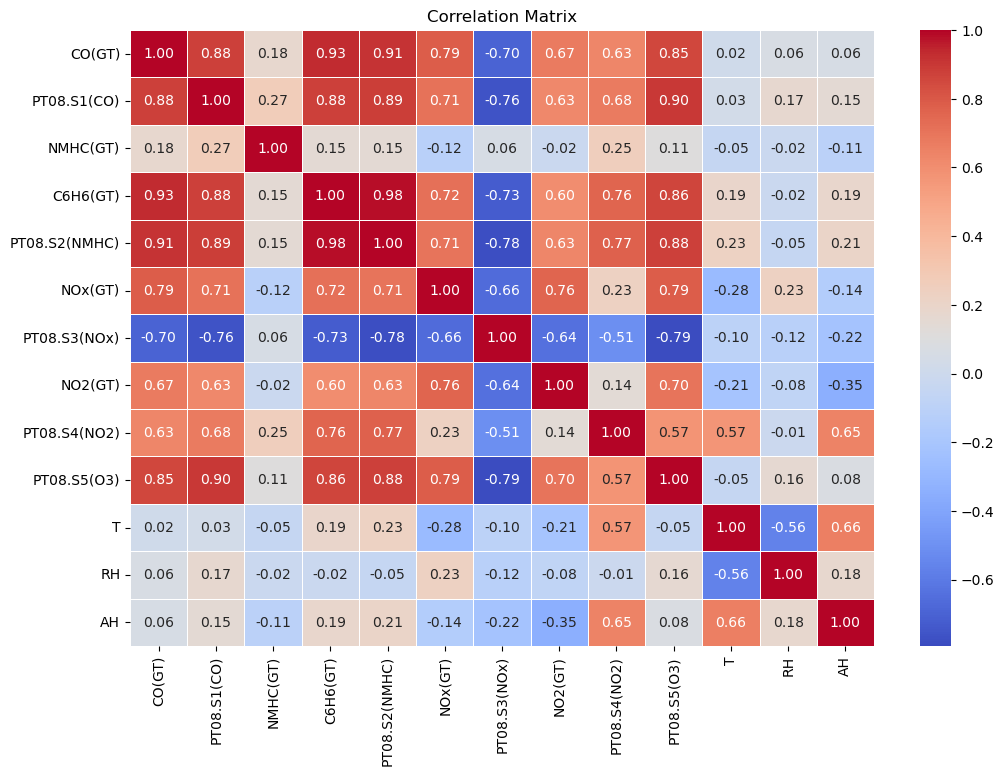

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [123]:
correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1)]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day_of_week,Hour
CO(GT),NaN,0.877019,NaN,0.930026,0.914316,0.786483,NaN,NaN,NaN,0.853481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S1(CO),0.877019,NaN,NaN,0.877458,0.886075,0.707738,NaN,NaN,NaN,0.897166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NMHC(GT),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C6H6(GT),0.930026,0.877458,NaN,NaN,0.982711,0.718410,NaN,NaN,0.761788,0.861186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S2(NMHC),0.914316,0.886075,NaN,0.982711,NaN,0.705407,NaN,NaN,0.774261,0.876784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx(GT),0.786483,0.707738,NaN,0.718410,0.705407,NaN,NaN,0.757079,NaN,0.788560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S3(NOx),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2(GT),NaN,NaN,NaN,NaN,NaN,0.757079,NaN,NaN,NaN,0.702659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S4(NO2),NaN,NaN,NaN,0.761788,0.774261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PT08.S5(O3),0.853481,0.897166,NaN,0.861186,0.876784,0.788560,NaN,0.702659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
X_CO=df[["PT08.S1(CO)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S5(O3)"]]
y_CO=df["CO(GT)"]
X_CO

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S5(O3)
0,1360.00,11.881723,1045.50,166.0,1267.50
1,1292.25,9.397165,954.75,103.0,972.25
2,1402.00,8.997817,939.25,131.0,1074.00
3,1375.50,9.228796,948.25,172.0,1203.25
4,1272.25,6.518224,835.50,131.0,1110.00
...,...,...,...,...,...
9352,1314.25,13.529605,1101.25,471.7,1728.50
9353,1162.50,11.355157,1027.00,353.3,1269.00
9354,1142.00,12.374538,1062.50,293.0,1092.00
9355,1002.50,9.547187,960.50,234.5,769.75


In [145]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

XCO_train,XCO_test,yCO_train,yCO_test=train_test_split(X_CO,y_CO,test_size=0.25,random_state=44)
COmodel=Ridge(alpha=0.000001)
COmodel.fit(XCO_train,yCO_train)
COmodel.score(XCO_test,yCO_test)


0.8913320757313044

In [112]:
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day_of_week,Hour
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004,3,10,2,18
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004,3,10,2,19
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004,3,10,2,20
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004,3,10,2,21
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004,3,10,2,22
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772,2004,3,10,2,23
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312,2004,3,11,3,00
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238,2004,3,11,3,01
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819,2004,3,11,3,02
11,2004-03-11,05:00:00,0.7,1066.00,8,1.133431,512.00,16.0,1918.00,28.0,1182.00,421.75,11.000,56.175000,0.736560,2004,3,11,3,05


In [128]:
yCO_test,XCO_test

(8336    0.8
 9045    2.0
 5749    0.8
 2532    0.7
 3007    1.1
        ... 
 8288    1.5
 8931    4.9
 4369    4.7
 6207    4.2
 3712    1.5
 Name: CO(GT), Length: 1736, dtype: float64,
       PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S5(O3)
 8336       909.50   1.192106         517.50     65.8       404.00
 9045      1196.75   9.100166         943.25    255.9       951.00
 5749       950.50   5.743679         799.75    162.0       835.50
 2532       893.25   3.737742         696.00     48.0       801.25
 3007       867.75   6.742318         845.50     72.0       836.00
 ...           ...        ...            ...      ...          ...
 8288      1008.00   4.270707         725.50    228.2      1083.25
 8931      1412.50  18.398967        1251.00    645.7      1681.50
 4369      1383.25  24.085687        1405.75    502.0      1677.75
 6207      1423.25  20.972831        1323.25    803.0      1567.75
 3712      1066.25   6.946757         854.50    101.0       928.75
 
 [1736

In [146]:
fetures=pd.DataFrame([{"PT08.S1(CO)":1196,"C6H6(GT)":9.100166,"PT08.S2(NMHC)":943.25,"NOx(GT)":255.9 ,"PT08.S5(O3)":951.00}])
COmodel.predict(fetures)

array([2.14548432])